In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')

In [3]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построим точечный график взаимосвязи между жёсткостью воды и средней годовой смертностью

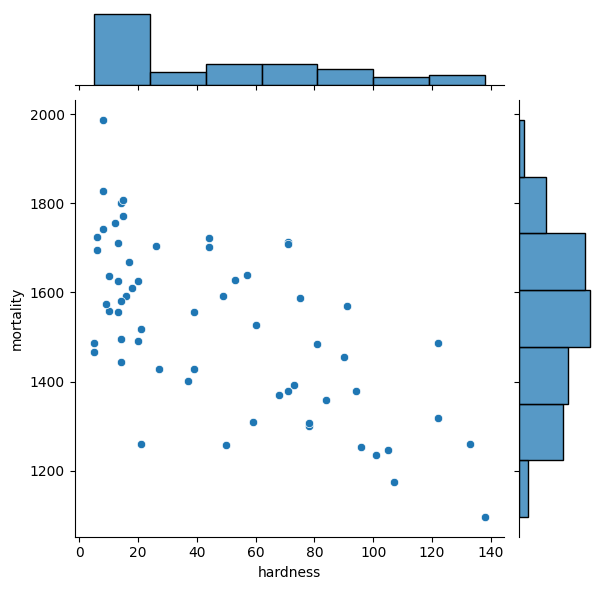

In [6]:
sns.jointplot(x='hardness', y ='mortality', data=df)

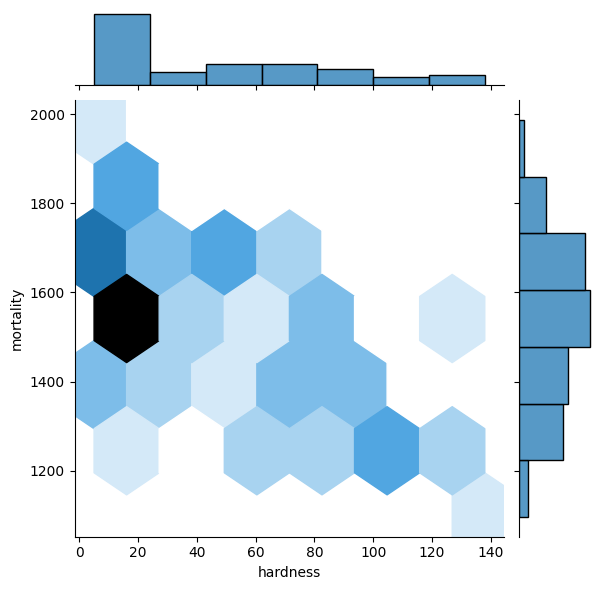

In [7]:
sns.jointplot(x='hardness', y ='mortality', data=df, kind='hex')

Рассчитаем коэффициенты корреляции Пирсона и Спирмена

In [8]:
# считаем коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Построим модель линейной регрессии

In [10]:
X = df[['hardness']]
y = df['mortality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)

[-3.52188263]
1693.7415671001386


In [ ]:
# построим модель предсказания
y = - 3,52 * x + 1693,74

In [19]:
y_pred = lr.predict(X_test)
y_pred

array([1676.13215394, 1556.38814443, 1376.77213017, 1264.07188593,
       1676.13215394, 1665.56650604, 1507.08178758, 1419.03472176,
       1619.78203182, 1672.61027131, 1647.95709288, 1443.68790019,
       1623.30391445, 1633.86956235, 1644.43521024, 1563.4319097 ])

In [20]:
y_test

2     1466
16    1555
39    1456
18    1318
38    1486
45    1987
57    1627
7     1299
19    1260
40    1696
51    1557
50    1713
15    1491
1     1668
3     1800
27    1402
Name: mortality, dtype: int64

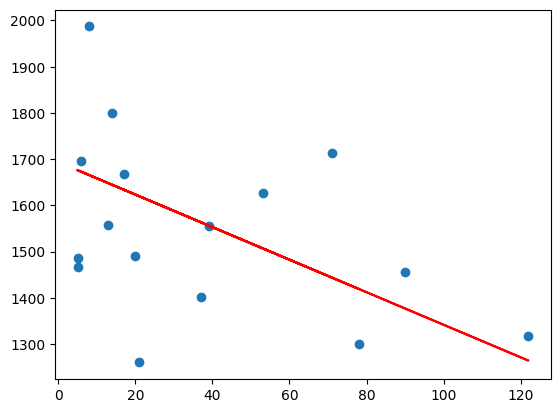

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Рассчитаем коэффициент детерминации

In [22]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.11669850011084537
MAE: 145.1916793187669
MSE: 31332.715782218453
RMSE: 177.01049624872095


Выводим график остатков

<Axes: xlabel='mortality', ylabel='Count'>

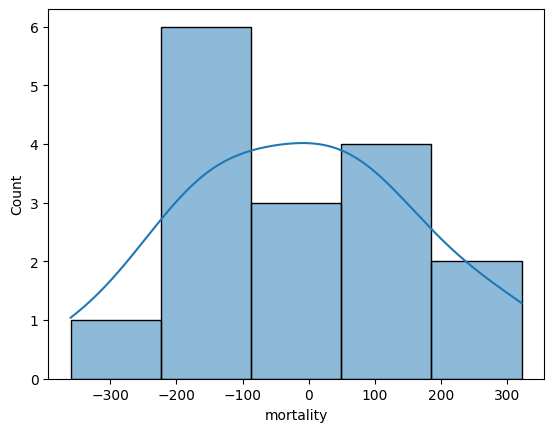

In [24]:
sns.histplot((y_test-y_pred), kde=True)

**Вывод:**   


### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделяем данные на две группы

In [26]:
import matplotlib.pyplot as plt

location
North    Axes(0.125,0.11;0.775x0.77)
South    Axes(0.125,0.11;0.775x0.77)
dtype: object

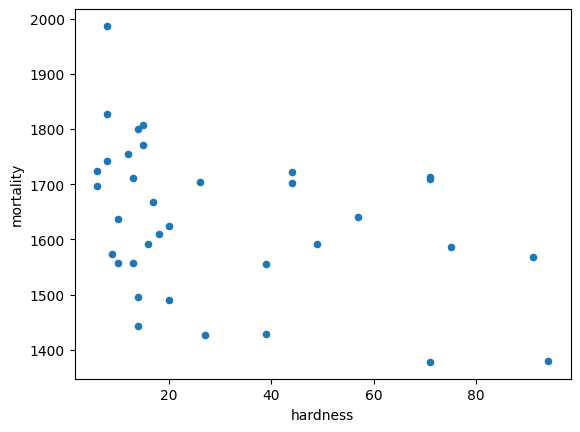

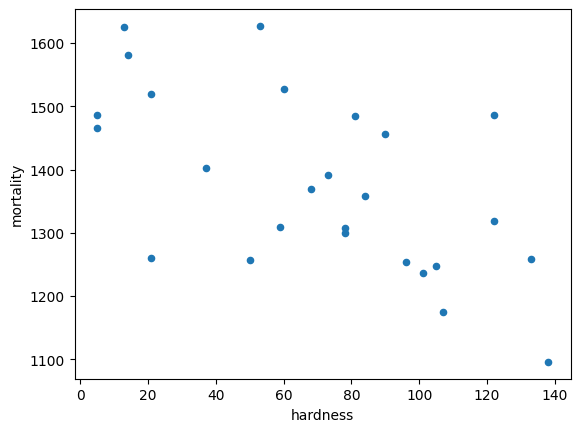

In [42]:
df.groupby(['location']).plot(kind='scatter', x='hardness', y='mortality')

In [43]:
# считаем коэф. корреляции Пирсона
df.groupby(['location'])[['hardness', 'mortality']].corr()

hardness  mortality
location                               
North    hardness   1.000000  -0.368598
         mortality -0.368598   1.000000
South    hardness   1.000000  -0.602153
         mortality -0.602153   1.000000

In [44]:
# считаем коэф. корреляции Спирмана
df.groupby(['location'])[['hardness', 'mortality']].corr(method='spearman')

hardness  mortality
location                               
North    hardness   1.000000  -0.404208
         mortality -0.404208   1.000000
South    hardness   1.000000  -0.595723
         mortality -0.595723   1.000000

Построим модель линейной регрессии

In [45]:
X = df.groupby(['location'])[['hardness']]
y = df.groupby(['location'])['mortality']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=39)

IndexError: Column(s) ['hardness'] already selected